# WSA Matplotlib Demo

### Imports & Reading in Data

Both `pandas` and `matplotlib` are included with Anaconda, so no installation should be necessary unless you are running this notebook through another distribution.

In [1]:
# Make sure to run this cell!
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Michigan_GameLogs_F24.csv').drop(columns=['id'])
df.rename(columns = {
    'home_away' : 'location',
    'points_scored' : 'pts_scored',
    'points_against' : 'pts_against',
    'pass_td' : 'pass_tds',
    'pass_1st_down' : 'pass_first_downs',
    'rush_td' : 'rush_tds',
    'rush_1st_down' : 'rush_first_downs'
}, inplace = True)
df

,date,year,opponent,location,result,pts_scored,pts_against,pass_cmp,pass_att,pass_pct,pass_yrds,pass_tds,pass_first_downs,rush_att,rush_yrds,rush_tds,rush_first_downs,total_offense,fumbles,ints
0,2011-09-03,2011,Western Michigan,Home,W,34,10,9,13,69.2,98,0,5,26,190,3,9,288,0,0
1,2011-09-10,2011,Notre Dame,Home,W,35,31,11,24,45.8,338,4,10,26,114,1,5,452,0,3
2,2011-09-17,2011,Eastern Michigan,Home,W,31,3,7,18,38.9,95,2,5,50,376,2,19,471,0,1
3,2011-09-24,2011,San Diego State,Home,W,28,7,8,17,47.1,93,0,3,45,320,4,14,413,2,2
4,2011-10-01,2011,Minnesota,Home,W,58,0,18,25,72.0,217,3,10,48,363,3,19,580,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-09-21,2024,Southern California,Home,W,27,24,7,12,58.3,32,0,0,46,290,3,12,322,2,0
169,2024-09-28,2024,Minnesota,Home,W,27,24,10,18,55.6,86,1,5,43,155,2,9,241,0,1
170,2024-10-05,2024,Washington,Away,L,17,27,13,25,52.0,113,1,7,37,174,1,9,287,1,1
171,2024-10-19,2024,Illinois,Away,L,7,21,20,32,62.5,208,0,8,38,114,1,10,322,2,1


### Scatter Plots

* We can create a scatter plot between two different columns with `plt.scatter()`
* We can use `plt.xlabel()` and `plt.ylabel()` to add labels to the axes
* We can use `plt.title()` to add a title for the entire plot

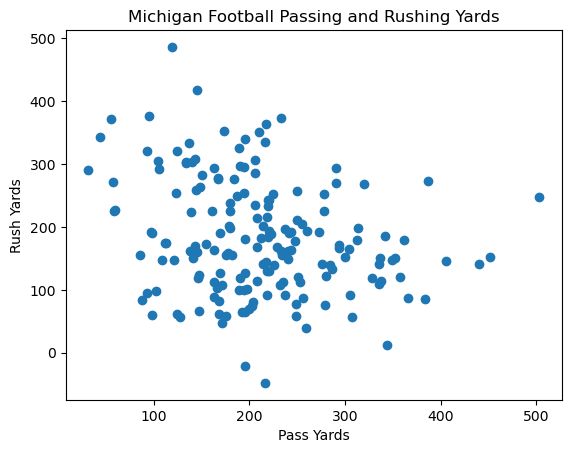

In [5]:
# Basic scatter plot with axes labels
plt.scatter(df['pass_yrds'], df['rush_yrds'])
plt.xlabel('Pass Yards')
plt.ylabel('Rush Yards')
plt.title('Michigan Football Passing and Rushing Yards')
plt.show()

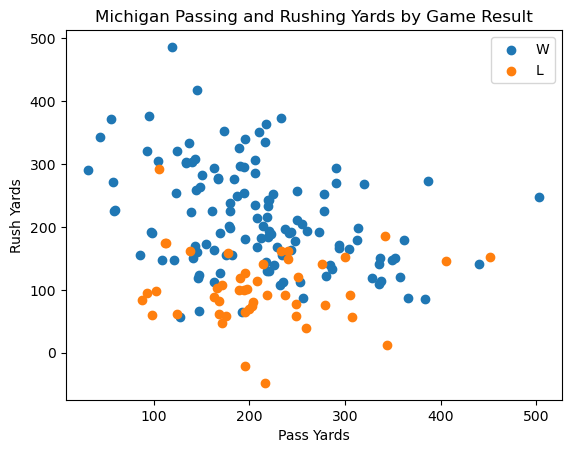

In [7]:
# we can change the colors of each data point based on a certain condition, in this case result
plt.figure(figsize = (6.4, 4.8))
groups = df.groupby('result', sort=False)
for res, group in groups:
    plt.scatter(group['pass_yrds'], group['rush_yrds'], label=res)
plt.legend()
plt.xlabel('Pass Yards')
plt.ylabel('Rush Yards')
plt.title('Michigan Passing and Rushing Yards by Game Result')
plt.show()

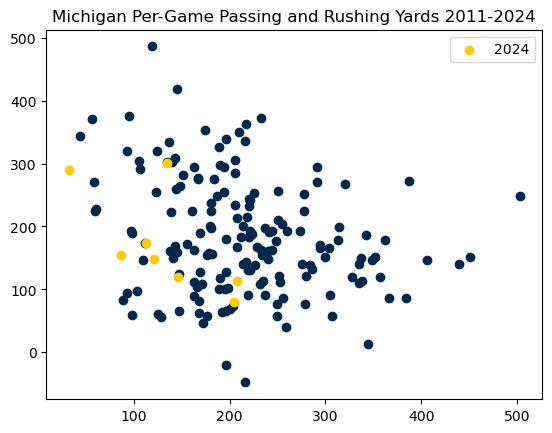

In [9]:
# Emphasizing datapoints from a specific group
plt.figure()
groups = pd.DataFrame(df.groupby('year'))
for group in groups.iloc[0:-1,1]:
    plt.scatter(group['pass_yrds'], group['rush_yrds'], color='#00274C')
plt.scatter(groups.iloc[-1,1]['pass_yrds'], groups.iloc[-1,1]['rush_yrds'], label='2024', color='#FFCB05')
plt.legend()
plt.title('Michigan Per-Game Passing and Rushing Yards 2011-2024')
plt.show()

In [11]:
print(f'{df.corr(numeric_only=True)['pass_yrds']['rush_yrds']:.4f}')

-0.2427


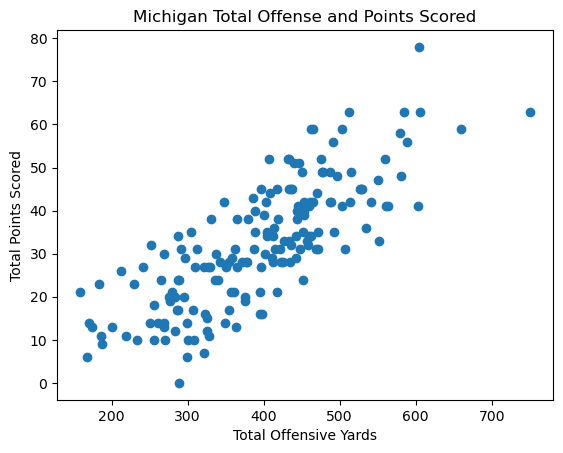

In [13]:
# Another basic scatter plot with variables that are more correlated
plt.clf()
plt.scatter(df['total_offense'], df['pts_scored'])
plt.xlabel('Total Offensive Yards')
plt.ylabel('Total Points Scored')
plt.title('Michigan Total Offense and Points Scored')
plt.show()

In [15]:
print(f'{df.corr(numeric_only=True)['total_offense']['pts_scored']:.4f}')

0.7891


### Bar Graph

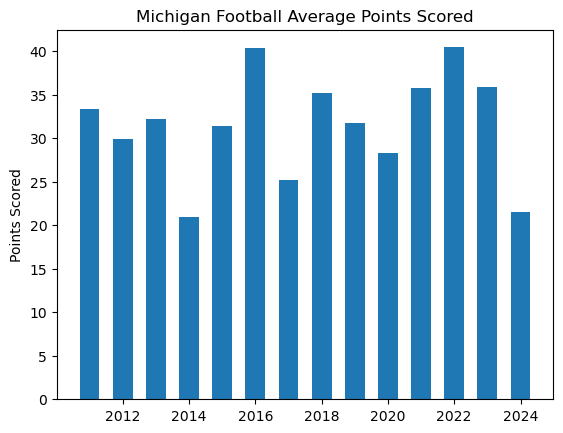

In [17]:
# Basic bar graph that shows Michigan's points for each year
plt.clf()
avg_points = df.groupby('year')['pts_scored'].mean()
plt.bar(x = avg_points.keys(), height = avg_points.values, width=0.6)
plt.ylabel('Points Scored')
plt.title('Michigan Football Average Points Scored')
plt.show()

<Figure size 640x480 with 0 Axes>

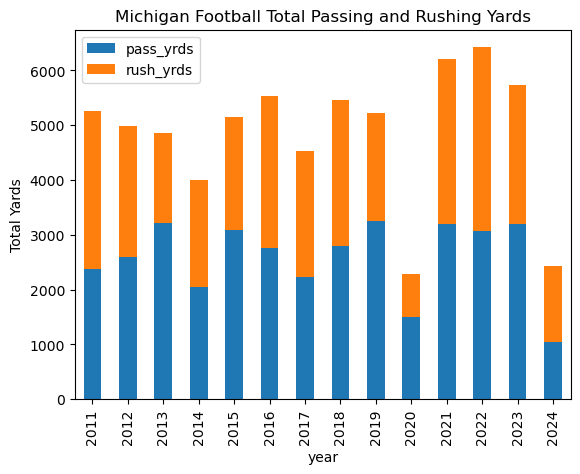

In [19]:
# Stacked bar chart showing how Michigan's rushing and passing yards compiled each year
plt.clf()
avg_yards = df.groupby('year')[['pass_yrds', 'rush_yrds']].sum()
avg_yards.plot(kind = 'bar', stacked = True)
plt.ylabel('Total Yards')
plt.title('Michigan Football Total Passing and Rushing Yards')
plt.show()

<Figure size 640x480 with 0 Axes>

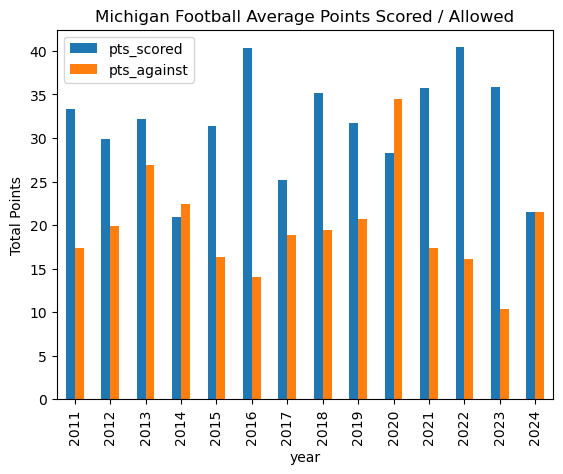

In [21]:
# Side-by-side bar chart showing Michigan's points scored and allowed each year
plt.clf()
points = df.groupby('year')[['pts_scored', 'pts_against']].mean()
points.plot(kind = 'bar')
plt.ylabel('Total Points')
plt.title('Michigan Football Average Points Scored / Allowed')
plt.show()

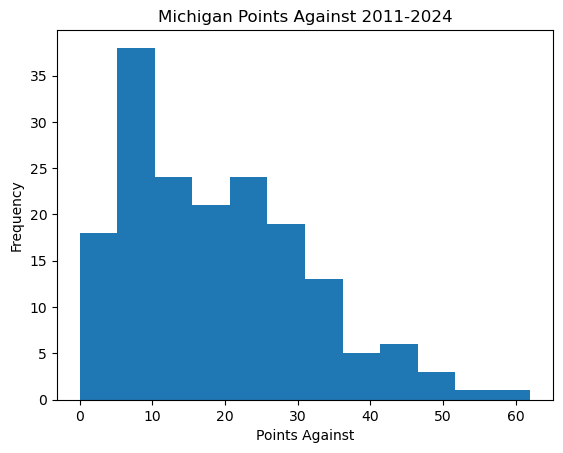

In [23]:
# Basic Histogram
# For quantitative, not qualitative (categorical) data
plt.clf()
plt.hist(df['pts_against'], bins=12)
plt.xlabel('Points Against')
plt.ylabel('Frequency')
plt.title('Michigan Points Against 2011-2024')
plt.show()

### Pie Charts

In [25]:
# This creates a list of the top 10 most common michigan football opponents
top_10_opps = df['opponent'].value_counts()[:10].index.tolist()
top_10_opps

['Michigan State',
 'Ohio State',
 'Penn State',
 'Indiana',
 'Rutgers',
 'Minnesota',
 'Maryland',
 'Iowa',
 'Northwestern',
 'Nebraska']

In [27]:
# This creates a new df that only contains the rows in which michigan played one of the top 10 most frequent colleges
opponent_freq_df = df[df['opponent'].isin(top_10_opps)]
opponent_freq_df

,date,year,opponent,location,result,pts_scored,pts_against,pass_cmp,pass_att,pass_pct,pass_yrds,pass_tds,pass_first_downs,rush_att,rush_yrds,rush_tds,rush_first_downs,total_offense,fumbles,ints
4,2011-10-01,2011,Minnesota,Home,W,58,0,18,25,72.0,217,3,10,48,363,3,19,580,0,0
5,2011-10-08,2011,Northwestern,Away,W,42,24,19,28,67.9,362,2,14,50,179,4,8,541,0,3
6,2011-10-15,2011,Michigan State,Away,L,14,28,12,31,38.7,168,1,6,36,82,1,8,250,0,1
8,2011-11-05,2011,Iowa,Away,L,16,24,18,38,47.4,196,2,10,37,127,0,10,323,1,1
10,2011-11-19,2011,Nebraska,Home,W,45,17,11,19,57.9,180,2,6,61,238,4,14,418,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2023-11-18,2023,Maryland,Away,W,31,24,12,23,52.2,141,0,9,45,150,3,9,291,0,1
161,2023-11-25,2023,Ohio State,Home,W,30,24,17,21,81.0,182,1,10,39,156,2,8,338,0,0
162,2023-12-02,2023,Iowa,Neutral,W,26,0,22,30,73.3,147,0,9,34,66,2,3,213,0,0
169,2024-09-28,2024,Minnesota,Home,W,27,24,10,18,55.6,86,1,5,43,155,2,9,241,0,1


<Axes: title={'center': 'Top 10 Michigan Football Opponents by Percentage'}>

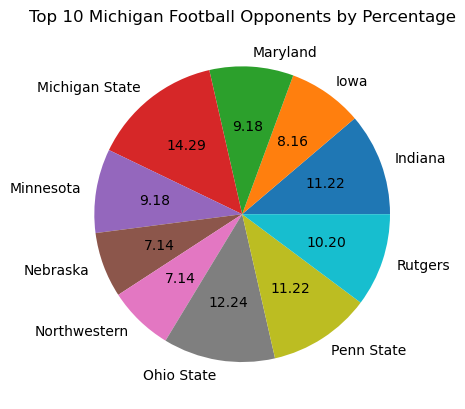

In [29]:
# Basic pie chart that displays this data by opponent
opponent_freq_df.groupby('opponent').size().plot(kind = 'pie',
                                                 autopct = '%.2f',
                                                 title = 'Top 10 Michigan Football Opponents by Percentage')

In [31]:
colors = {'Michigan State' : '#18453B',
         'Ohio State' : '#BB0000',
         'Penn State' : '#041E42',
         'Indiana' : '#990000',
         'Rutgers' : '#CC0033',
         'Minnesota' : '#7A0019',
         'Maryland' : '#E03A3E',
         'Iowa' : '#FFCD00',
         'Northwestern' : '#4E2A84',
         'Nebraska' : '#E41C38'}

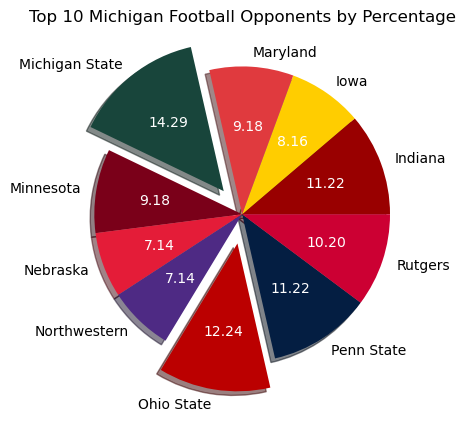

In [33]:
# Alternate code for plot
freq_opp = opponent_freq_df.groupby('opponent').size()
plt.figure()
patches, texts, autotexts = plt.pie(x = freq_opp, 
        autopct = '%.2f',
        labels = freq_opp.keys(),
        shadow = True,
        explode = [0,0,0,0.2,0,0,0,0.2,0,0], 
        colors = freq_opp.keys().map(colors))
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Top 10 Michigan Football Opponents by Percentage')
plt.show()

### Plots for Exploratory Data Analysis

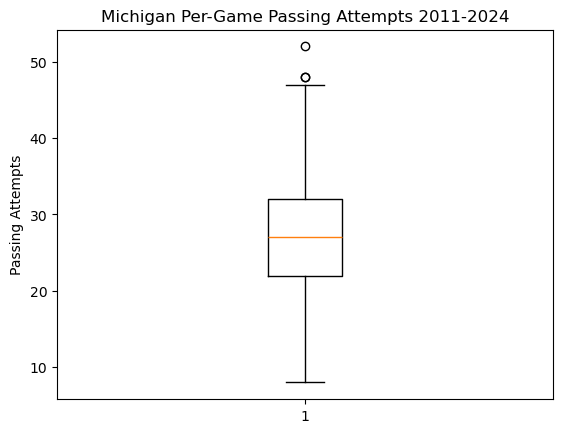

In [35]:
# Basic Boxplot
plt.clf()
pass_att_df = df['pass_att']
plt.boxplot(pass_att_df)
plt.ylabel('Passing Attempts')
plt.title('Michigan Per-Game Passing Attempts 2011-2024')
plt.show()

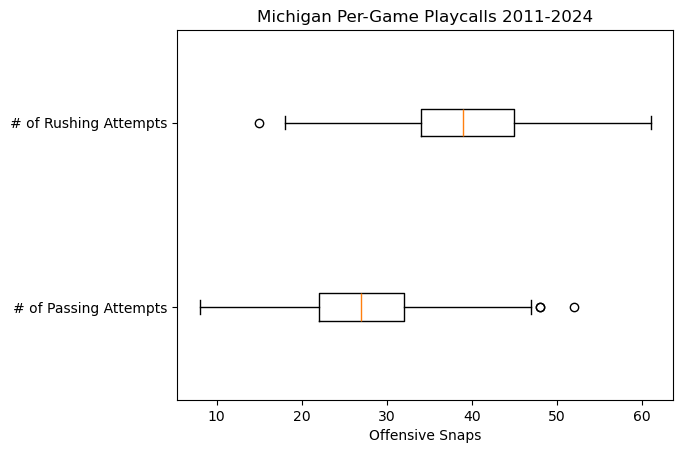

In [37]:
# Side-by-Side Boxplot
plt.clf()
att_df = df[['pass_att', 'rush_att']]
plt.boxplot(att_df, vert = False, labels = ['# of Passing Attempts', '# of Rushing Attempts'])
plt.xlabel('Offensive Snaps')
plt.title('Michigan Per-Game Playcalls 2011-2024')
plt.show()

In [39]:
# What games are the outliers?

print(df[['pass_att', 'rush_att']].sort_values(by='rush_att').head(5))
print(df[['pass_att', 'rush_att']].sort_values(by='pass_att', ascending=False).head(5))

     pass_att  rush_att
38         38        15
118        34        18
119        26        19
105        42        19
166        33        23
     pass_att  rush_att
117        52        34
120        48        43
129        48        34
37         47        35
62         47        25


In [41]:
outliers = df.iloc[[38, 117, 120, 129]]
outliers

,date,year,opponent,location,result,pts_scored,pts_against,pass_cmp,pass_att,pass_pct,pass_yrds,pass_tds,pass_first_downs,rush_att,rush_yrds,rush_tds,rush_first_downs,total_offense,fumbles,ints
38,2013-12-28,2013,Kansas State,Neutral,L,14,31,24,38,63.2,196,0,9,15,65,1,5,261,0,1
117,2020-10-31,2020,Michigan State,Home,L,24,27,32,52,61.5,300,0,18,34,152,3,9,452,0,0
120,2020-11-21,2020,Rutgers,Away,W,48,42,32,48,66.7,349,4,16,43,147,2,9,496,1,0
129,2021-10-30,2021,Michigan State,Away,L,33,37,31,48,64.6,406,3,17,34,146,0,8,552,1,1


### Bonus: Heatmap

In [43]:
import numpy as np

# .values.tolist() changes DataFrame to a list
x = df['pass_pct'].values.tolist()
y = df['pts_scored'].values.tolist()

# Normalizes values to between 0 and 1
x_norm = [float(i)/sum(x) for i in x]
y_norm = [float(i)/sum(y) for i in y]

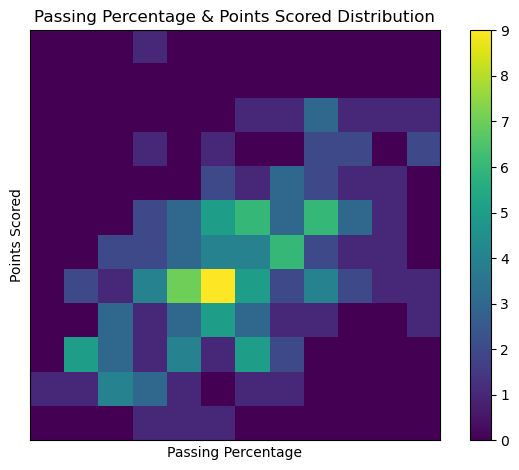

In [45]:
# Creates a 2D histogram that is set as squares
# Bins denotes how many squares on the density map
heatmap, xedges, yedges = np.histogram2d(x_norm, y_norm, bins=12)

plt.clf()
plt.xlabel('Passing Percentage')
plt.ylabel('Points Scored')
plt.title('Passing Percentage & Points Scored Distribution')

# False in tick_params gets rid of all ticks and value labels
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)

# .T for transpose, else x would be swapped with y on the plot
plt.imshow(heatmap.T, origin='lower')
plt.colorbar()
plt.tight_layout()
plt.show()